In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

**Ejercicio 1**

Trabajamos con las variables "bill_length_mm" y "bill_depth_mm" de pinguinos.

1. Escalar las variables por Standard Scaler (KNN es sensible a las escalas)
2. Para cada uno de los pinguinos 15, 313 y 151 (ver slides), numerar en un gráfico los 9 pinguinos mas cercanos, ordenados de más cerca a más lejos.
3. Clasificar cada pingüino utilizando KNN con K = 1, 3 y 9.

In [3]:
# Utilizamos NearestNeighbors para obtener los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors

In [4]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = StandardScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,181.0,3750.0,Male
1,Adelie,Torgersen,-0.822788,0.119584,186.0,3800.0,Female
2,Adelie,Torgersen,-0.676280,0.424729,195.0,3250.0,Female
3,Adelie,Torgersen,-1.335566,1.085877,193.0,3450.0,Female
4,Adelie,Torgersen,-0.859415,1.747026,190.0,3650.0,Male


In [5]:
# Nos quedamos solo con largo y profundidad del pico
datos = penguins[["bill_depth_mm", "bill_length_mm"]]
datos

,bill_depth_mm,bill_length_mm
0,0.780732,-0.896042
1,0.119584,-0.822788
2,0.424729,-0.676280
3,1.085877,-1.335566
4,1.747026,-0.859415
...,...,...
328,-1.762145,0.587352
329,-1.457000,0.514098
330,-0.744994,1.173384
331,-1.202712,0.221082


In [37]:
# Veamos primero los 9 vecinos más cercanos del pingüino 151
K = 9 
ind = 151
neighbors = NearestNeighbors(n_neighbors=K+1)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 10.
neighbors.fit(datos)  # En el ajuste solamente almacenamos los datos

NearestNeighbors(n_neighbors=10)

In [38]:
# Cómo se guardan los datos??

# Podemos ver todos los atributos (variables) de una clase usando __dict__
neighbors.__dict__

{'n_neighbors': 10,
 'radius': 1.0,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'feature_names_in_': array(['bill_depth_mm', 'bill_length_mm'], dtype=object),
 'n_features_in_': 2,
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[ 7.80732104e-01, -8.96041890e-01],
        [ 1.19583967e-01, -8.22787867e-01],
        [ 4.24729261e-01, -6.76279821e-01],
        [ 1.08587740e+00, -1.33556603e+00],
        [ 1.74702554e+00, -8.59414878e-01],
        [ 3.23014163e-01, -9.32668901e-01],
        [ 1.23845005e+00, -8.77728384e-01],
        [ 2.21299065e-01, -5.29771775e-01],
        [ 2.05217083e+00, -9.87609419e-01],
        [ 2.00131328e+00, -1.72014965e+00],
        [ 3.23014163e-01, -1.35387953e+00],
        [ 9.33304752e-01, -9.69295913e-01],
        [ 1.79788309e+00, -2.73382694e-01],
        [ 6.28159457e-01, -1.75677666e+00],
        [ 2.20474348e+00,  

In [39]:
# Ahora podemos buscar los vecinos más cercanos a un punto cualquiera o un conjunto de puntos.
# Tenemos que pasarle un DataFrame
distances, indices = neighbors.kneighbors(datos.iloc[[ind]])

In [40]:
# Nos devuelve un vector de distancias (opcional) de los puntos más cercanos
distances

array([[0.        , 0.21976207, 0.22567119, 0.23836288, 0.24344706,
        0.25638908, 0.26182053, 0.27027184, 0.27937072, 0.29347379]])

In [41]:
# Lo convertimos a vector
distances.flatten()

array([0.        , 0.21976207, 0.22567119, 0.23836288, 0.24344706,
       0.25638908, 0.26182053, 0.27027184, 0.27937072, 0.29347379])

Vemos que las distancias están ordenadas de menor a mayor.

In [42]:
# Y un vector de índices de los puntos más cercanos

In [43]:
indices.flatten() 

array([151, 174, 123, 187, 146, 156, 152, 198, 170, 250])

In [44]:
np.arange(K+1).astype(str)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U21')

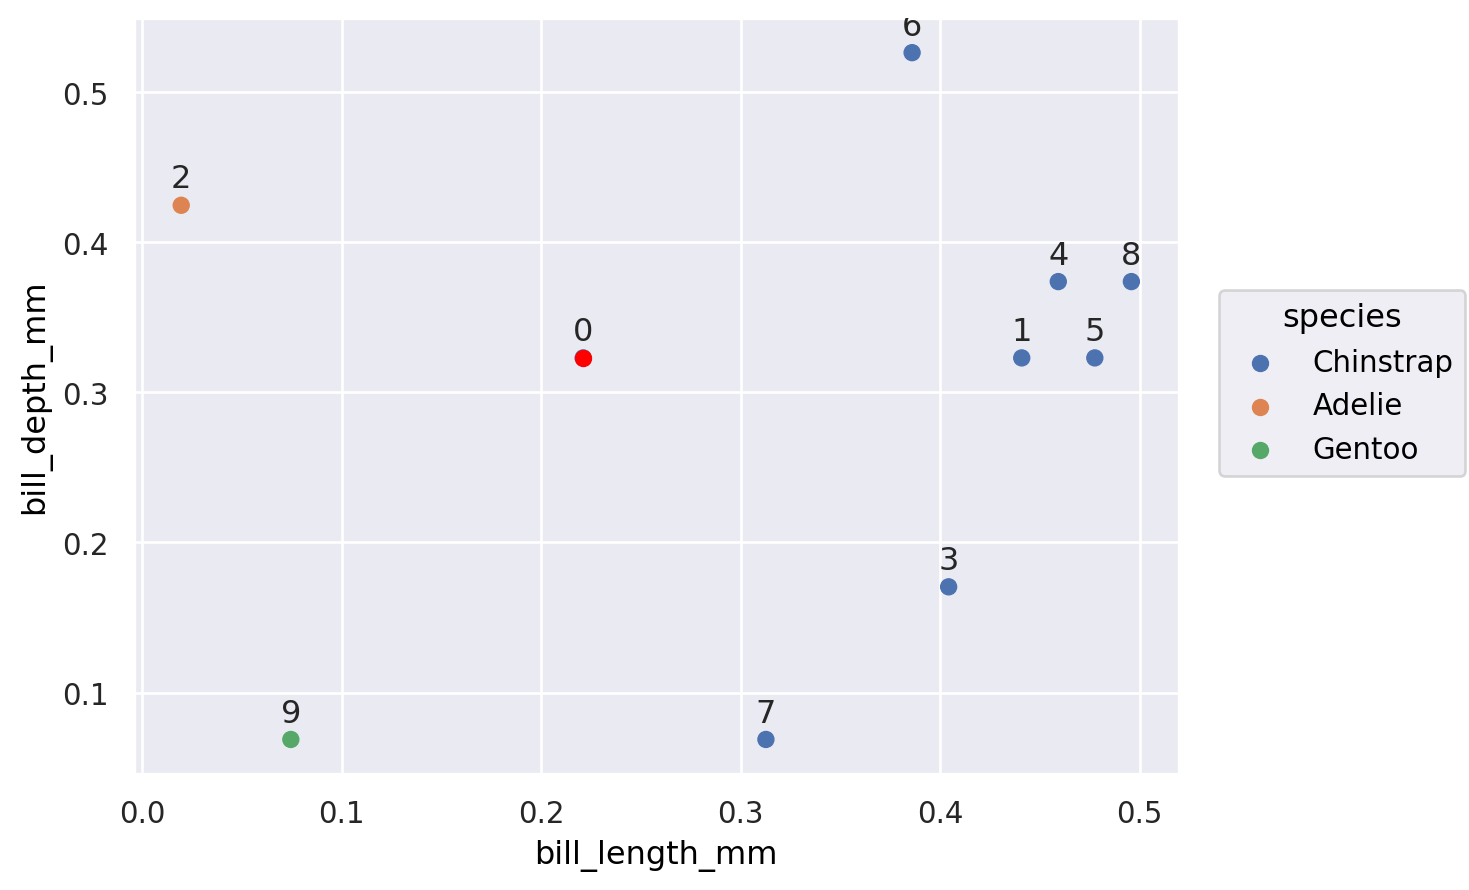

In [45]:
# Graficamos
# Utilizamos un nuevo canal para codificar información: texto o etiquetas en cada punto
(
    so.Plot(data = penguins.iloc[indices.flatten()], x = "bill_length_mm", y = "bill_depth_mm",  text = np.arange(K+1).astype(str))
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(), color = "species")
    .add(so.Dot(color = "red"), data = penguins.iloc[[ind]], x = "bill_length_mm", y = "bill_depth_mm")
)

**Ejercicio 2**

1. Implementar una función que reciba un DataFrame (que tenga solo las variables numéricas a utilizar para medir distancias), un vector de categorías (indexado igual que el DataFrame), un índice y un valor de K y devuelva la predicción por KNN para el dato indicado. Importante: debemos ignorar al propio dato en la votación.
2. Aplicar la función a los datos de pingüinos.

**Sugerencia:** para elegir la categoría más votada podemos calcular la moda. El paquete statistics provee el comando `mode`.


In [46]:
# Cargamos el comando mode
import statistics
from statistics import mode

In [47]:
# Item 1

# Antes de hacer la función lo calculamos para un ejemplo.
K = 9
ind = 151
datos = penguins[["bill_depth_mm", "bill_length_mm"]]
categorias = penguins["species"]

In [48]:
# Cargamos los datos en neighbors
neighbors = NearestNeighbors(n_neighbors= K)  # Vamos a eliminar al propio pinguino de los datos, por eso tomamos K.
neighbors.fit(datos.drop([ind]))

NearestNeighbors(n_neighbors=9)

In [53]:
distances, indices = neighbors.kneighbors(datos.iloc[[ind]])
votos = categorias.iloc[indices.flatten()]
votos

173    Chinstrap
123       Adelie
186    Chinstrap
146    Chinstrap
155    Chinstrap
151    Chinstrap
197    Chinstrap
169    Chinstrap
249       Gentoo
Name: species, dtype: object

In [56]:
mode(votos)

'Chinstrap'

In [57]:
# Juntamos todo en una función
def mas_votado(datos, categorias, ind, K):
    neighbors = NearestNeighbors(n_neighbors= K)  # Vamos a eliminar al propio pinguino de los datos, por eso tomamos K.
    neighbors.fit(datos.drop([ind]))

    distances, indices = neighbors.kneighbors(datos.iloc[[ind]])
    votos = categorias.iloc[indices.flatten()]

    return(mode(votos))

In [59]:
# Item 2 - Aplicamos la función a los datos de pingüinos
datos = penguins[["bill_depth_mm", "bill_length_mm"]]
categorias = penguins["species"]
mas_votado(datos, categorias, 15, 9)

'Adelie'

**Ejercicio 3**
1. Implementar una función que reciba un DataFrame, un vector de categorías y un valor de K y calcule las predicciones para todos los datos y nos devuelva el porcentaje de aciertos. (Notar que estamos haciendo implicitamente validación leave-one-out.)
2. Aplicar la función a los datos de pingüinos.

In [65]:
# Item 1
def knn_leave_one_out(datos, categorias, K):
    correctos = 0
    total = len(datos)
    for ind in range(total):
        prediccion = mas_votado(datos, categorias, ind, K)
        if(prediccion == categorias[ind]):
            correctos += 1
    return(correctos/total)

In [66]:
# Item 2 - Aplicamos la función a los datos de pingüinos
datos = penguins[["bill_depth_mm", "bill_length_mm"]]
categorias = penguins["species"]
knn_leave_one_out(datos, categorias, 9)

0.963963963963964

**Ejercicio 4**
Utilizando las funciones de los ejercicios anteriores, calcular el valor de $K$ (impar) óptimo para predecir la especie de un pingüino.

In [68]:
for K in range(1,30,1):
    aciertos = knn_leave_one_out(datos, categorias, K)
    print(K, aciertos)

1 0.9429429429429429
2 0.9429429429429429
3 0.9579579579579579
4 0.9579579579579579
5 0.9669669669669669
6 0.960960960960961
7 0.963963963963964
8 0.960960960960961
9 0.963963963963964
10 0.960960960960961
11 0.960960960960961
12 0.960960960960961
13 0.9669669669669669
14 0.963963963963964
15 0.960960960960961
16 0.960960960960961
17 0.963963963963964
18 0.960960960960961
19 0.960960960960961
20 0.960960960960961
21 0.9579579579579579
22 0.954954954954955
23 0.9579579579579579
24 0.954954954954955
25 0.954954954954955
26 0.954954954954955
27 0.954954954954955
28 0.954954954954955
29 0.963963963963964


Utilizamos ahora la función de sklean: KNeighborsClassifier

## Ejemplo: detección temprana de diabetes

A partir de distintos datos de pacientes queremos detectar tempranamente si ese paciente va a sufrir diabetes.

1. Leer los datos del archivo "diabetes.csv".
2. Separar la columna "Outcome" como variable respuesta y el resto como variables explicativas.
3. Partir la muestra en un 80% para entrenamiento y un 20% para testeo.
4. Escalar las variables explicativas por StandardScaler
5. Se quiere predecir la variable respuesta por KNN. Calcular el valor óptimo de $K$ optimizando el porcentaje de aciertos en testeo.
7. Para el valor hallado, calcular la matriz de confusión en testeo (es la matriz $C$ que guarda en la coordenada $C_{ij}$ la cantidad de observaciones en el grupo $i$ que fueron clasificadas en el grupo $j$).

In [91]:
# Utilizamos estos paquetes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [92]:
datos = pd.read_csv("/home/Estudiante/Descargas/diabetes.csv")
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
# 2. Separamos la variable respuesta
X = datos.drop("Outcome",axis=1)
y = datos["Outcome"]

In [94]:
# 3. Separamos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
# 4. Escalamos X
scaler = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train) # esto porque?
X_test_scaled = scaler.transform(X_test)
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 '_sklearn_output_config': {'transform': 'pandas'},
 'feature_names_in_': array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'Pedigree', 'Age'], dtype=object),
 'n_features_in_': 8,
 'n_samples_seen_': 614,
 'mean_': array([  3.93159609, 120.17752443,  69.33713355,  20.56351792,
         77.27687296,  31.91710098,   0.47100326,  33.30781759]),
 'var_': array([1.16239854e+01, 1.02768347e+03, 3.59317937e+02, 2.44988636e+02,
        1.29194413e+04, 5.76107988e+01, 1.08010114e-01, 1.37945965e+02]),
 'scale_': array([  3.40939663,  32.05750254,  18.9556835 ,  15.65211284,
        113.66372005,   7.59017778,   0.32864892,  11.74504001])}

In [96]:
neighbor = KNeighborsClassifier(n_neighbors=5)

In [97]:
# Entrenamos utilizando X_train
neighbor.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [98]:
# Predecimos utilizando X_test
y_pred = neighbor.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [99]:
# Calculamos la precisión con accuracy_score (porcentaje de aciertos)
print(accuracy_score(y_test,y_pred))

0.6818181818181818


In [100]:
# Como lo podemos hacer a mano?


In [101]:
(y_test == y_pred).sum()/len(y_test)

0.6818181818181818

In [102]:
# Repetimos todo para varios valores de K
for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train_scaled,y_train)
    y_pred = neighbor.predict(X_test_scaled)
   
    print(K, accuracy_score(y_test,y_pred))

1 0.6688311688311688
3 0.7142857142857143
5 0.6818181818181818
7 0.6883116883116883
9 0.6948051948051948
11 0.6883116883116883
13 0.6948051948051948
15 0.7142857142857143
17 0.7142857142857143
19 0.7142857142857143
21 0.7077922077922078
23 0.7272727272727273
25 0.7207792207792207
27 0.7272727272727273
29 0.7077922077922078


**Matriz de confusión**
La matriz de confusión $C$ guarda en la coordenada $C_{ij}$ la cantidad de observaciones en el grupo $i$ que fueron clasificadas en el grupo $j$.

Si la variable es binaria:
- $C_{00}$ son los casos negativos clasificados correctamente.
- $C_{01}$ son los casos negativos  clasificados como positivos (falsos positivos).
- $C_{10}$ son los casos positivos  clasificados como negativos (falsos negativos).
- $C_{11}$ son los casos positivos clasificados correctamente.

In [112]:
K = 9
neighbor = KNeighborsClassifier(n_neighbors=K)
neighbor.fit(X_train_scaled,y_train)
y_pred = neighbor.predict(X_test_scaled)

In [113]:
C = confusion_matrix(y_test,y_pred)
display(C)

array([[81, 16],
       [31, 26]])

**Ejercicio:** Calcular el coeficiente $C_{01}$ a mano.

In [114]:
sum((y_pred==1) & (y_test==0))

16

In [115]:
# Si solo nos interesa evaluar el desempeño podemos usar score en lugar de predict
neighbor.fit(X_train_scaled,y_train).score(X_test_scaled,y_test)

0.6948051948051948

In [116]:
neighbor

KNeighborsClassifier(n_neighbors=9)

**Ejercicio:** Utilizar KNeighborsClassifier con validación por leave-one-out.
En este caso podemos utilizar la función predict con parámetro None, y realiza las predicciones sobre el conjunto de entrenamiento, dejando siempre a la propia observacion afuera al hacer la predicción. Esto corresponde a validación leave-one-out.

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)

for K in range(1,30,2):
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_scaled,y)
    y_pred = neighbor.predict(None)
   
    print(K, ???)

**Extra:** Según la teoría, si aumentamos la cantidad de variables explicativas (y por lo tanto la dimensión del espacio de "features"), los puntos tienden a estar a distancias similares, es decir, disminuye la varianza de las distancias entre puntos.

Hagamos una simulación para verificarlo...

In [ ]:
# Este código me lo tiró ChatGPT... estará bien?

import numpy as np
from scipy.spatial.distance import pdist

def distancia_varianza(n, num_puntos=100):
    # Generar puntos aleatorios en [0,1]^n
    puntos = np.random.rand(num_puntos, n)
    
    # Calcular todas las distancias euclidianas por pares (sin repetir)
    distancias = pdist(puntos, metric='euclidean')

    # Calcular y devolver la varianza de las distancias
    return np.var(distancias)

# Ejemplo: calcular para dimensiones 1 a 20
for n in range(1, 20):
    var = distancia_varianza(n)
    print(f"Dimensión {n:2d} -> Varianza de distancias: {var:.6f}")

In [ ]:
# Qué pasó...? No disminuye la varianza??

In [ ]:
n = 2
num_puntos = 100
puntos = np.random.rand(num_puntos, n)
    
# Calcular todas las distancias euclidianas por pares (sin repetir)
distancias = pdist(puntos, metric='euclidean')
distancias

In [ ]:
# Para ver todas las coordenadas agregamos esta opción
np.set_printoptions(threshold=np.inf)  
distancias